In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)
sns.palplot(sns.color_palette("Blues"))
sns.set_style('whitegrid')
sns.set(font_scale=2)

In [2]:
DATA_PATH = '../data/'
train_label = pd.read_csv(DATA_PATH+'train_label.csv')
train_base = pd.read_csv(DATA_PATH+'train_base.csv')
test_base = pd.read_csv(DATA_PATH+'test_a_base.csv')

train_op = pd.read_csv(DATA_PATH+'train_op.csv')
train_trans = pd.read_csv(DATA_PATH+'train_trans.csv')
test_op = pd.read_csv(DATA_PATH+'test_a_op.csv')
test_trans = pd.read_csv(DATA_PATH+'test_a_trans.csv')

## 目标变量的分布

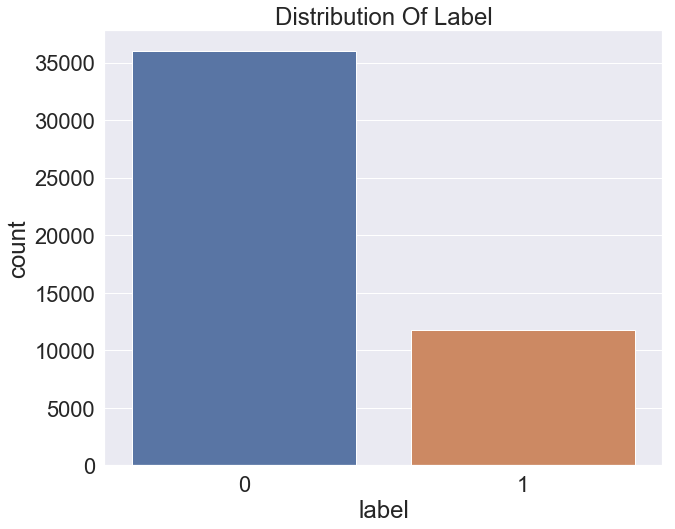

In [3]:
plt.figure(figsize=(10, 8))
sns.countplot(train_label['label'])
plt.title('Distribution Of Label')
plt.show()

In [4]:
train_label['label'].mean()

0.24653635260139803

## 基础信息数据

In [5]:
train_base = train_label.merge(train_base, on=['user'], how='left')

### 基础概况

In [6]:
train_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47782 entries, 0 to 47781
Data columns (total 47 columns):
user                 47782 non-null object
label                47782 non-null int64
sex                  47568 non-null object
age                  47782 non-null int64
provider             47782 non-null object
level                47782 non-null object
verified             47782 non-null object
using_time           47782 non-null int64
regist_type          47782 non-null object
card_a_cnt           47782 non-null int64
card_b_cnt           47782 non-null int64
card_c_cnt           47782 non-null int64
agreement1           47782 non-null object
op1_cnt              47782 non-null int64
op2_cnt              47782 non-null int64
card_d_cnt           47782 non-null int64
agreement_total      47782 non-null int64
service1_cnt         47782 non-null int64
service1_amt         47782 non-null int64
service2_cnt         47782 non-null int64
agreement2           47782 non-null object
a

### Nunique值

In [7]:
train_base.nunique()

user                 47782
label                    2
sex                      2
age                     48
provider                 3
level                    3
verified                 2
using_time              54
regist_type              8
card_a_cnt              18
card_b_cnt              11
card_c_cnt              15
agreement1               2
op1_cnt                 31
op2_cnt                 17
card_d_cnt               4
agreement_total         21
service1_cnt             7
service1_amt            58
service2_cnt             6
agreement2               2
agreement3               2
agreement4               2
acc_count               66
login_cnt_period1     2692
login_cnt_period2     1566
ip_cnt                 193
login_cnt_avg           76
login_days_cnt          91
province                31
city                   361
balance                 20
balance_avg             21
balance1                21
balance1_avg            21
balance2                20
balance2_avg             5
s

### 训练集和测试集的分布

In [8]:
for i in test_base.columns:
    trn_ = set(train_base[i].unique())
    tst_ = set(test_base[i].unique())
    print(i, len(trn_), len(tst_), 1.0*len(trn_&tst_)/len(tst_))

('user', 47782, 24315, 0.0)
('sex', 3, 3, 1.0)
('age', 48, 47, 0.8723404255319149)
('provider', 3, 4, 0.75)
('level', 3, 3, 1.0)
('verified', 2, 2, 1.0)
('using_time', 54, 54, 1.0)
('regist_type', 8, 8, 1.0)
('card_a_cnt', 18, 18, 0.9444444444444444)
('card_b_cnt', 11, 12, 0.9166666666666666)
('card_c_cnt', 15, 13, 0.9230769230769231)
('agreement1', 2, 2, 1.0)
('op1_cnt', 31, 25, 0.96)
('op2_cnt', 17, 14, 0.8571428571428571)
('card_d_cnt', 4, 4, 1.0)
('agreement_total', 21, 20, 1.0)
('service1_cnt', 7, 5, 1.0)
('service1_amt', 58, 42, 0.7619047619047619)
('service2_cnt', 6, 5, 1.0)
('agreement2', 2, 2, 1.0)
('agreement3', 2, 2, 1.0)
('agreement4', 2, 2, 1.0)
('acc_count', 66, 42, 0.8333333333333334)
('login_cnt_period1', 2692, 1992, 0.8177710843373494)
('login_cnt_period2', 1566, 1223, 0.8479149632052331)
('ip_cnt', 193, 179, 0.9162011173184358)
('login_cnt_avg', 76, 55, 0.9090909090909091)
('login_days_cnt', 91, 91, 1.0)
('province', 31, 32, 0.96875)
('city', 361, 345, 0.9971014492753

### 单变量分析（挑选个别）

#### 性别（Sex）

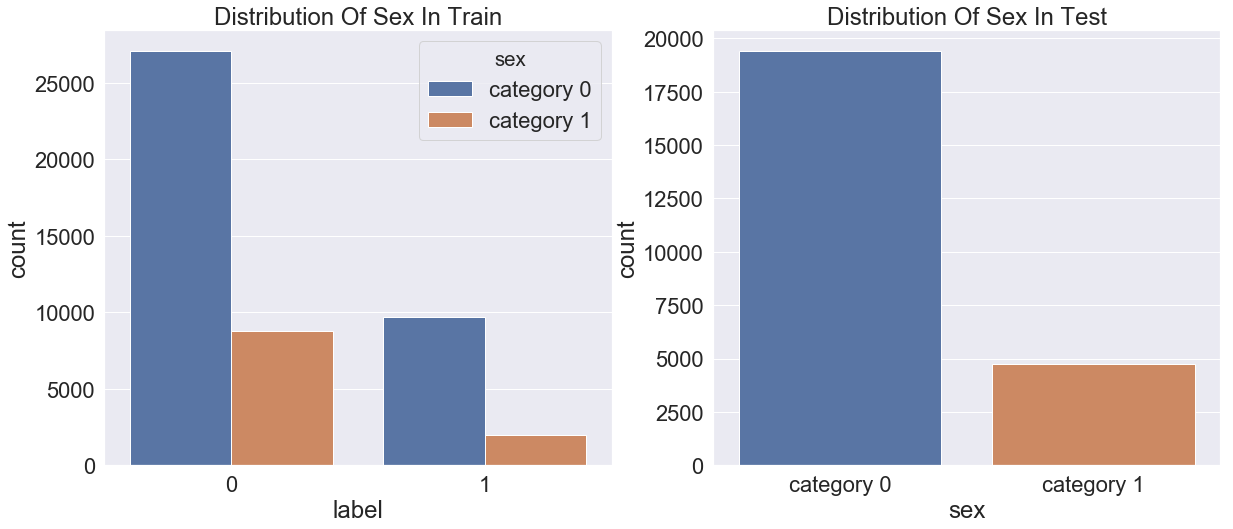

In [9]:
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
sns.countplot(x='label', hue='sex', data=train_base)
plt.title('Distribution Of Sex In Train')
plt.subplot(1,2,2)
sns.countplot(x='sex', data=test_base)
plt.title('Distribution Of Sex In Test')
plt.show()

#### 年龄（Age）

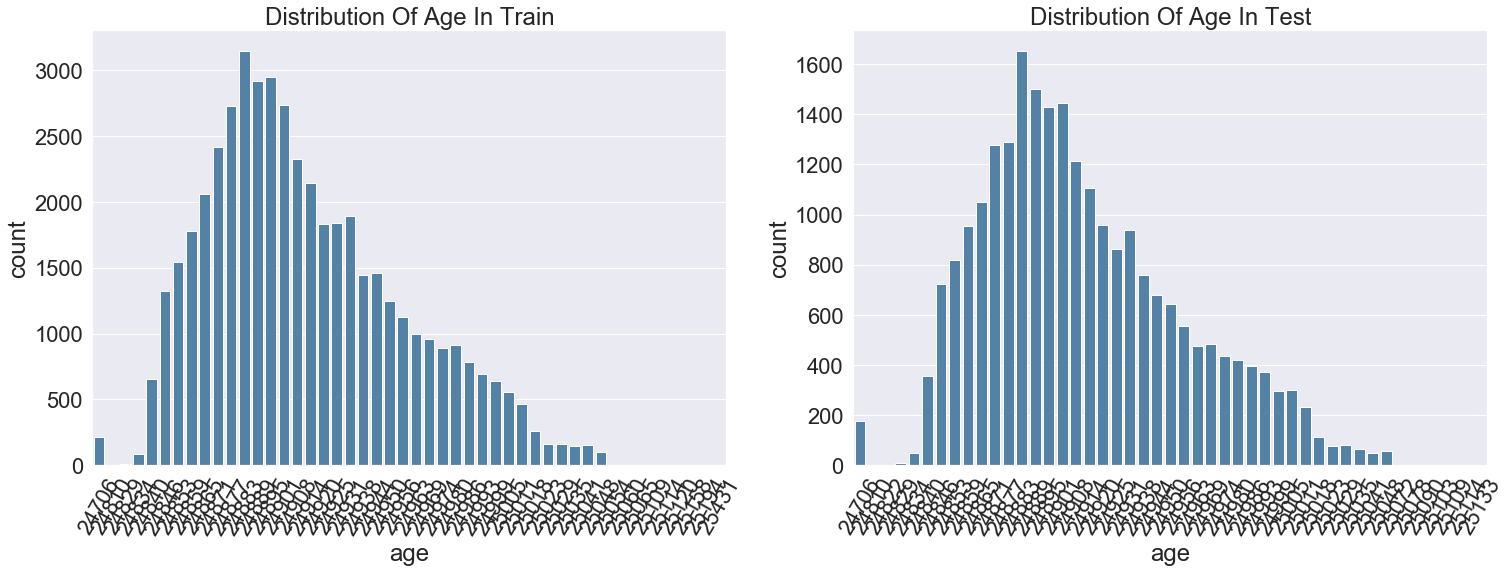

In [10]:
plt.figure(figsize=(25, 8))
plt.subplot(1,2,1)
sns.countplot(x='age', data=train_base, color='steelblue')
plt.title('Distribution Of Age In Train')
plt.xticks(rotation=60)
plt.subplot(1,2,2)
sns.countplot(x='age', data=test_base, color='steelblue')
plt.title('Distribution Of Age In Test')
plt.xticks(rotation=60)
plt.show()

Text(0.5,1,'Risk Ratio Of Different Age')

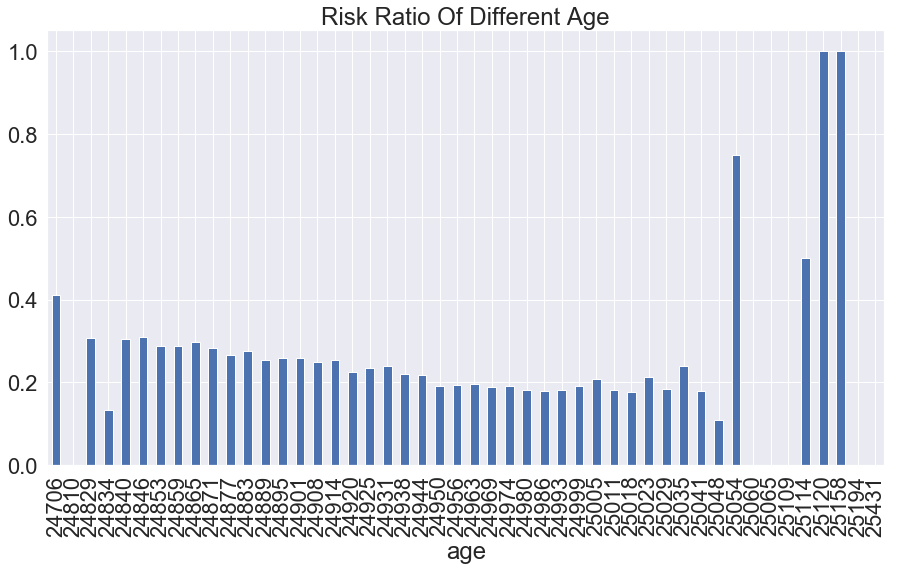

In [11]:
plt.figure(figsize=(15, 8))
train_base.groupby(['age'])['label'].mean().plot.bar()
plt.title('Risk Ratio Of Different Age')

#### 使用时长（using_time）
从风险用户比例的趋势来看，使用时间越长的风险越低

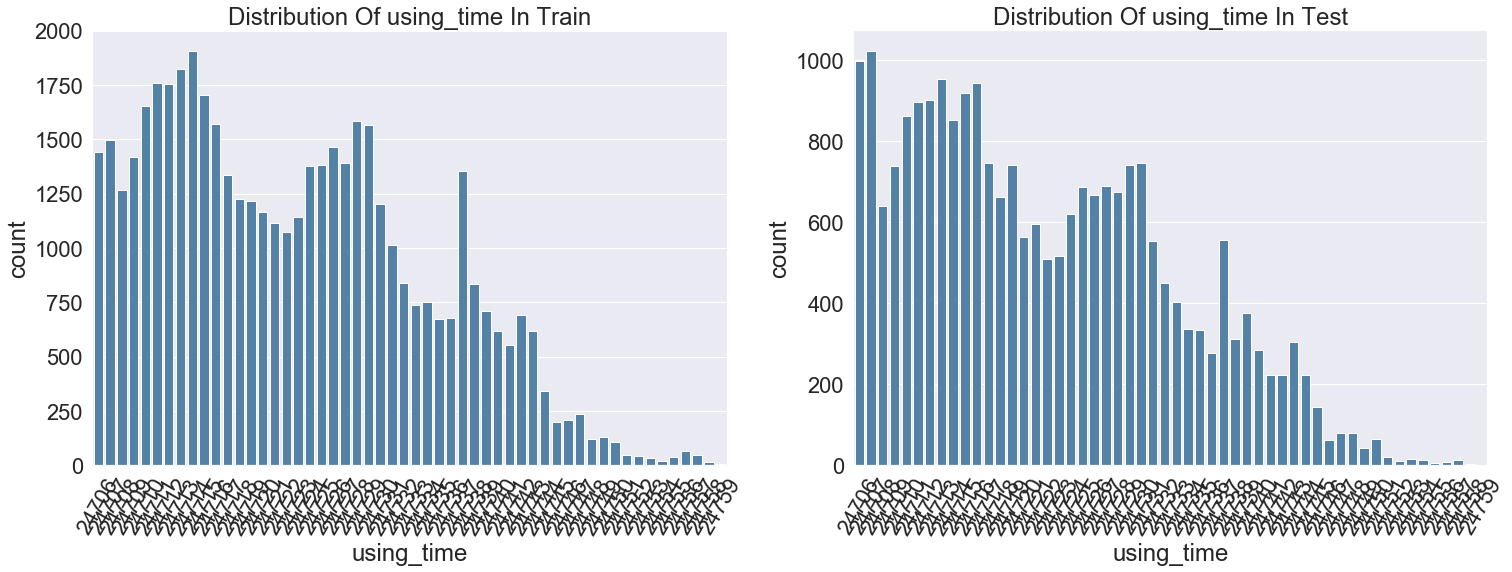

In [12]:
plt.figure(figsize=(25, 8))
plt.subplot(1,2,1)
sns.countplot(x='using_time', data=train_base, color='steelblue')
plt.title('Distribution Of using_time In Train')
plt.xticks(rotation=60)
plt.subplot(1,2,2)
sns.countplot(x='using_time', data=test_base, color='steelblue')
plt.title('Distribution Of using_time In Test')
plt.xticks(rotation=60)
plt.show()

Text(0.5,1,'Risk Ratio Of Different using_time')

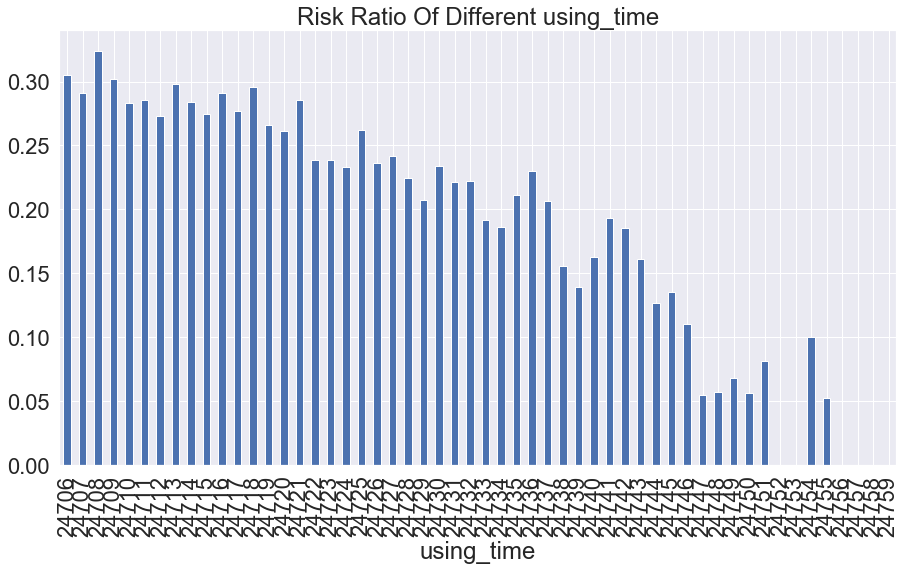

In [13]:
plt.figure(figsize=(15, 8))
train_base.groupby(['using_time'])['label'].mean().plot.bar()
plt.title('Risk Ratio Of Different using_time')

#### 注册类型（regist_type）
注册类型为category0，category4，category5，category6的用户较少，且没有风险用户

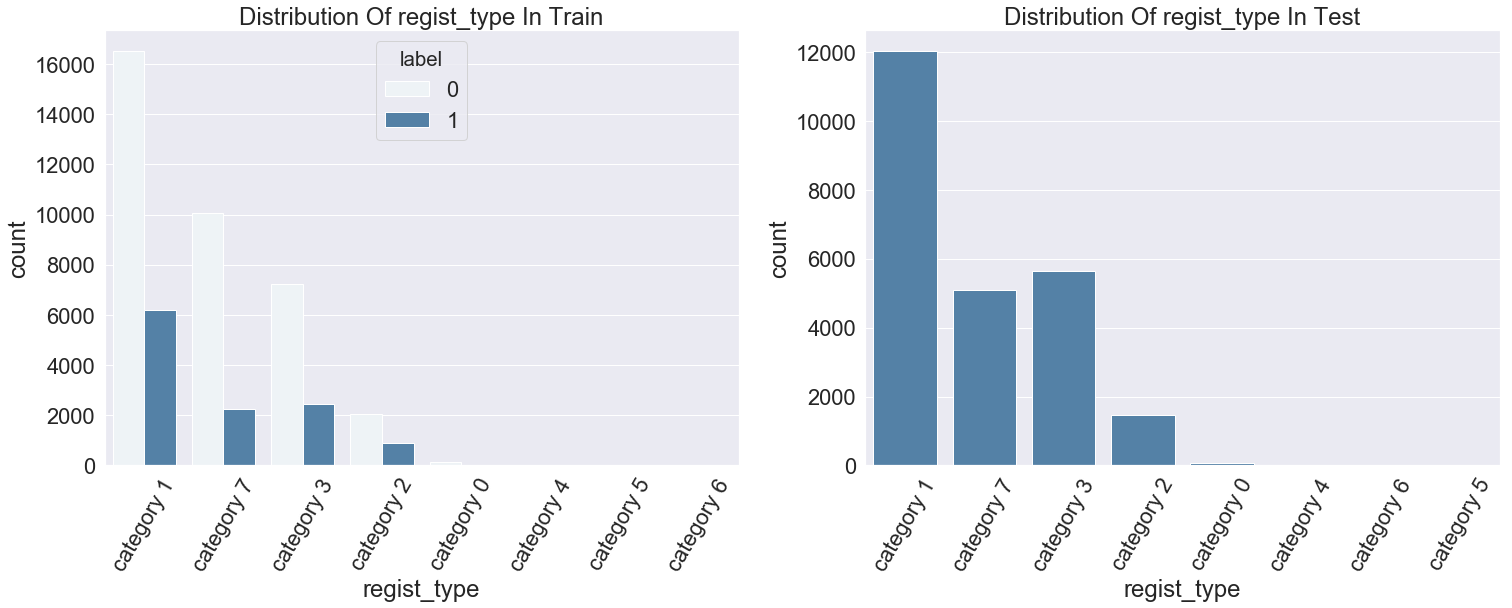

In [14]:
plt.figure(figsize=(25, 8))
plt.subplot(1,2,1)
sns.countplot(x='regist_type', hue='label', data=train_base, color='steelblue')
plt.title('Distribution Of regist_type In Train')
plt.xticks(rotation=60)
plt.subplot(1,2,2)
sns.countplot(x='regist_type', data=test_base, color='steelblue')
plt.title('Distribution Of regist_type In Test')
plt.xticks(rotation=60)
plt.show()

#### a类型卡的数量（card_a_cnt）

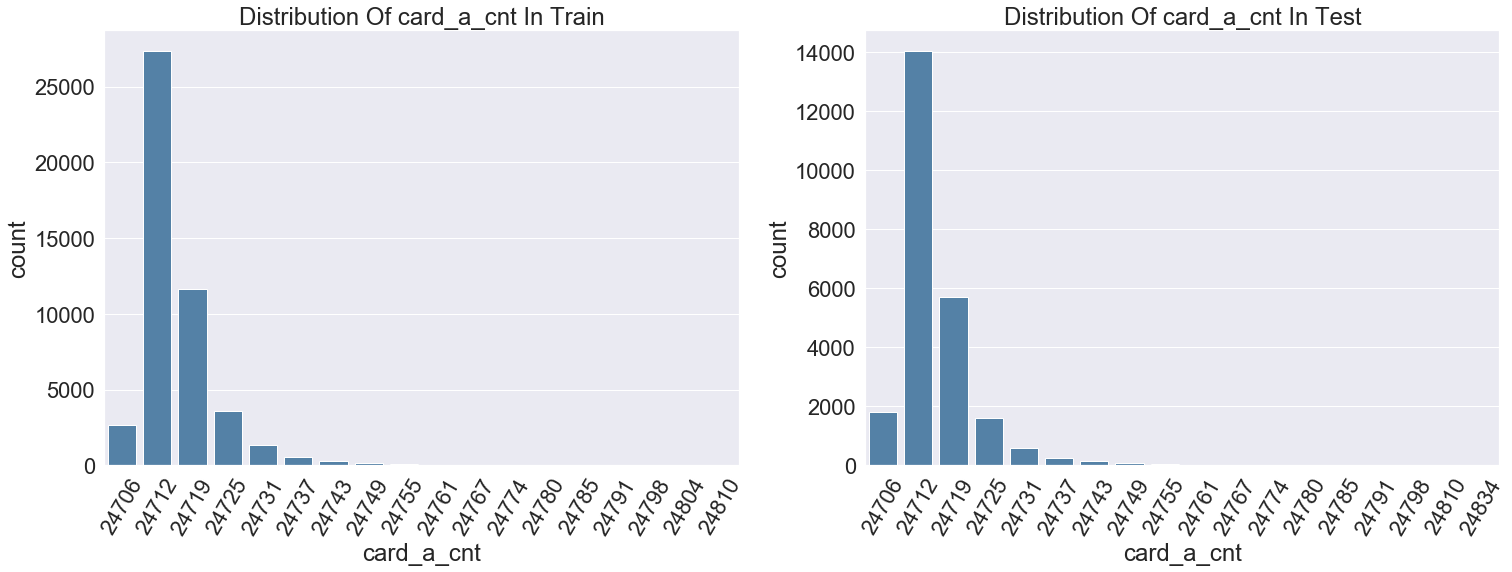

In [15]:
plt.figure(figsize=(25, 8))
plt.subplot(1,2,1)
sns.countplot(x='card_a_cnt', data=train_base, color='steelblue')
plt.title('Distribution Of card_a_cnt In Train')
plt.xticks(rotation=60)
plt.subplot(1,2,2)
sns.countplot(x='card_a_cnt', data=test_base, color='steelblue')
plt.title('Distribution Of card_a_cnt In Test')
plt.xticks(rotation=60)
plt.show()

Text(0.5,1,'Risk Ratio Of Different card_a_cnt')

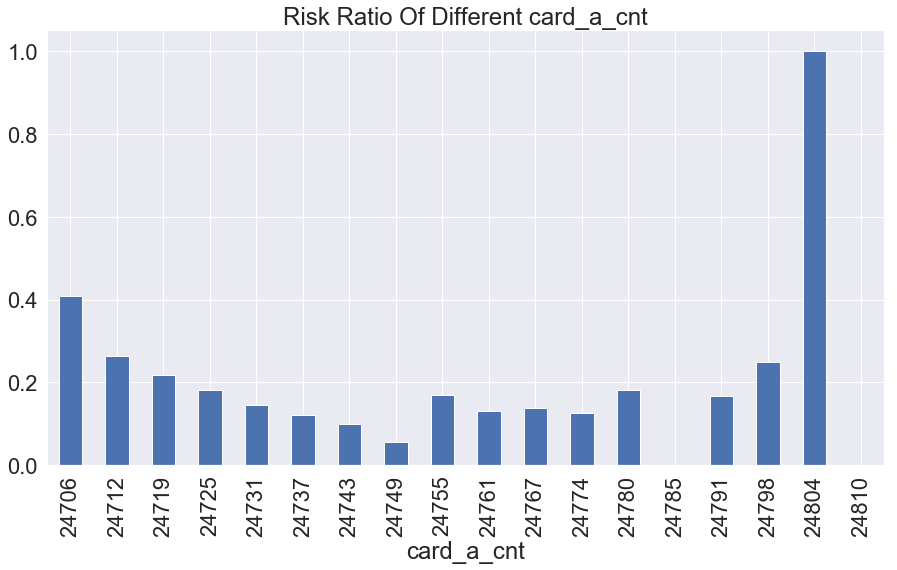

In [16]:
plt.figure(figsize=(15, 8))
train_base.groupby(['card_a_cnt'])['label'].mean().plot.bar()
plt.title('Risk Ratio Of Different card_a_cnt')

#### 产品7申请失败次数（product7_fail_cnt）
申请失败意味着用户大概率存在某些问题，所以单独看看这个字段

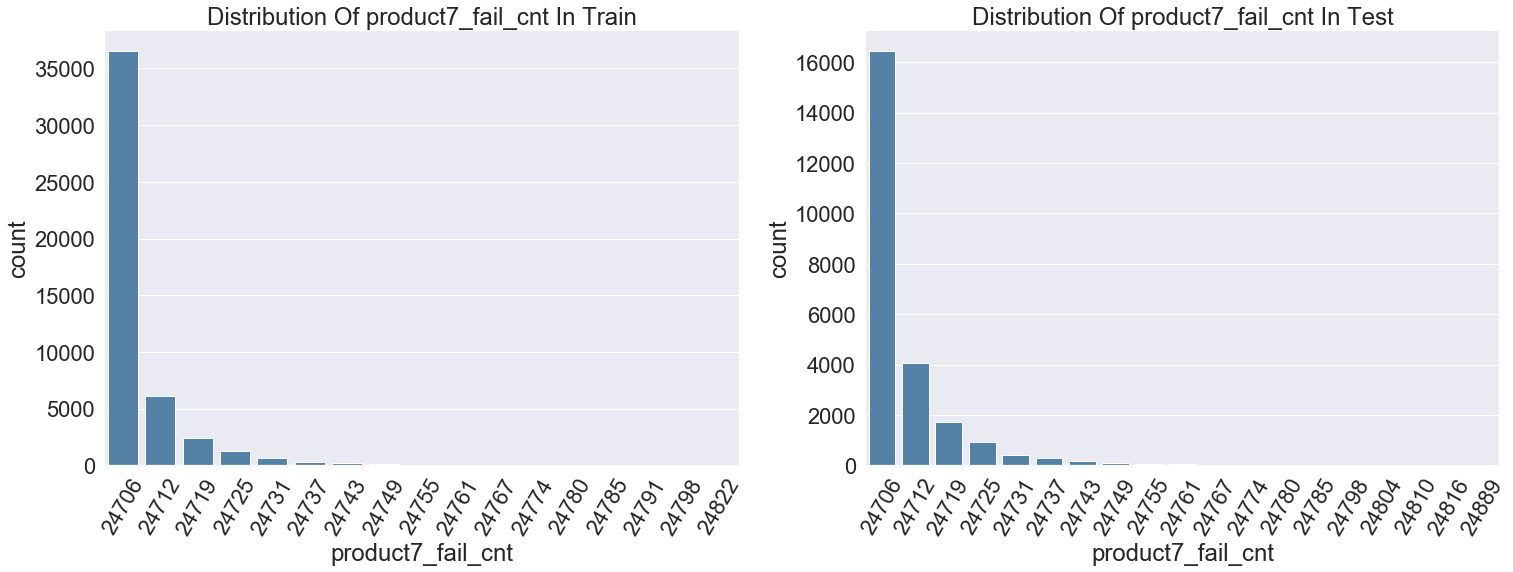

In [17]:
plt.figure(figsize=(25, 8))
plt.subplot(1,2,1)
sns.countplot(x='product7_fail_cnt', data=train_base, color='steelblue')
plt.title('Distribution Of product7_fail_cnt In Train')
plt.xticks(rotation=60)
plt.subplot(1,2,2)
sns.countplot(x='product7_fail_cnt', data=test_base, color='steelblue')
plt.title('Distribution Of product7_fail_cnt In Test')
plt.xticks(rotation=60)
plt.show()

Text(0.5,1,'Risk Ratio Of Different product7_fail_cnt')

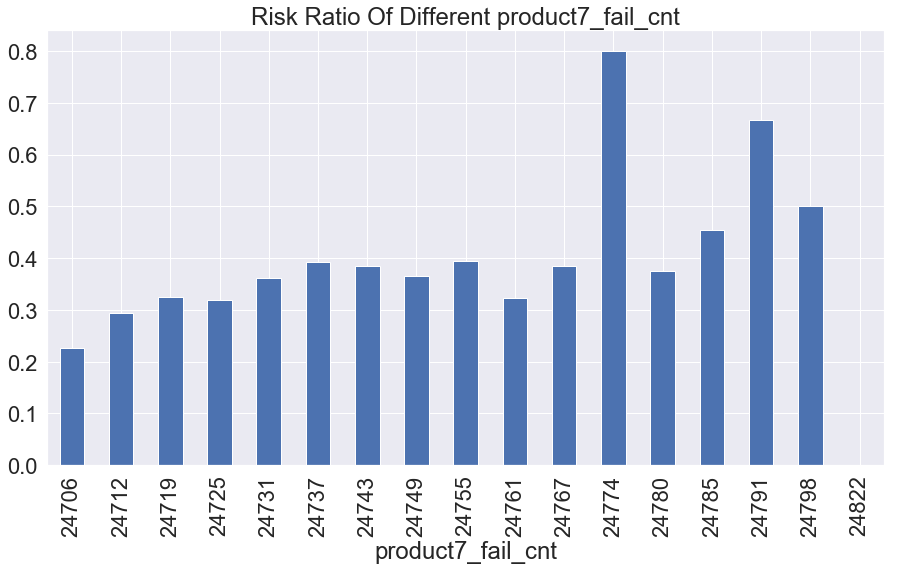

In [18]:
plt.figure(figsize=(15, 8))
train_base.groupby(['product7_fail_cnt'])['label'].mean().plot.bar()
plt.title('Risk Ratio Of Different product7_fail_cnt')

#### 城市（city）
不同用户风险用户比例参差不齐

Text(0.5,1,'Risk Ratio Of Different city')

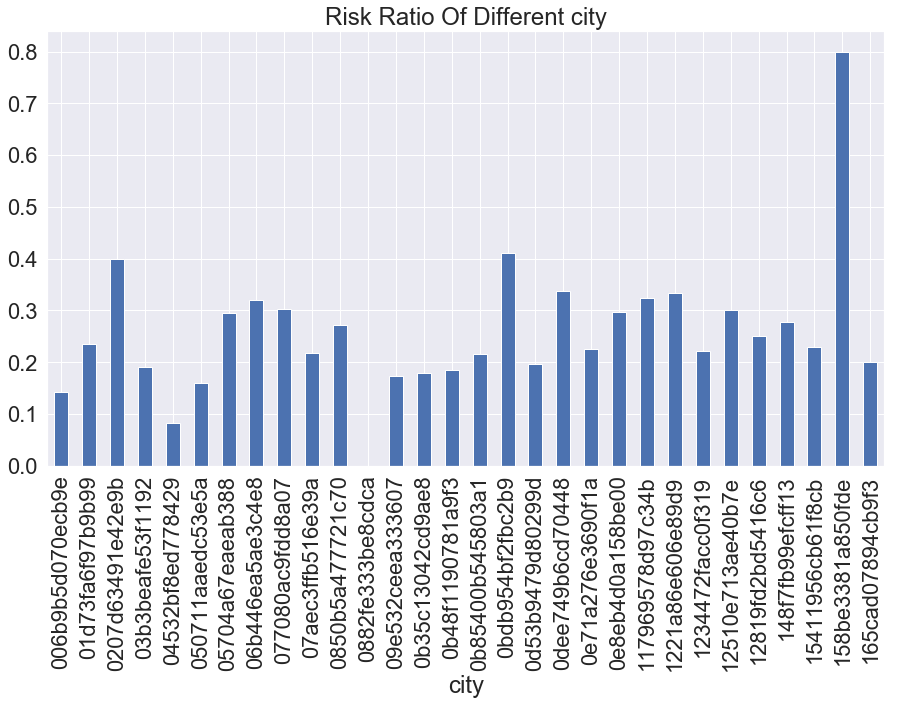

In [21]:
plt.figure(figsize=(15, 8))
train_base.groupby(['city'])['label'].mean().head(30).plot.bar()
plt.title('Risk Ratio Of Different city')

## 交易日志

In [22]:
def transform_time(x):
    day = int(x.split(' ')[0])
    hour = int(x.split(' ')[2].split('.')[0].split(':')[0])
    minute = int(x.split(' ')[2].split('.')[0].split(':')[1])
    second = int(x.split(' ')[2].split('.')[0].split(':')[2])
    return 86400*day+3600*hour+60*minute+second

In [23]:
train_trans = train_trans.merge(train_label, on=['user'], how='left')

In [24]:
train_trans['days_diff'] = train_trans['tm_diff'].apply(lambda x: int(x.split(' ')[0]))
train_trans['hour'] = train_trans['tm_diff'].apply(lambda x: int(x.split(' ')[2].split('.')[0].split(':')[0]))

test_trans['days_diff'] = test_trans['tm_diff'].apply(lambda x: int(x.split(' ')[0]))
test_trans['hour'] = test_trans['tm_diff'].apply(lambda x: int(x.split(' ')[2].split('.')[0].split(':')[0]))

In [25]:
pos_user = list(train_label[train_label['label']==1]['user'].unique())
neg_user = list(train_label[train_label['label']==0]['user'].unique())

### 数据概况

In [26]:
train_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 591266 entries, 0 to 591265
Data columns (total 13 columns):
user          591266 non-null object
platform      591266 non-null object
tunnel_in     435367 non-null object
tunnel_out    590750 non-null object
amount        591266 non-null int64
type1         591266 non-null object
ip            246341 non-null object
type2         429468 non-null object
ip_3          246341 non-null object
tm_diff       591266 non-null object
label         591266 non-null int64
days_diff     591266 non-null int64
hour          591266 non-null int64
dtypes: int64(4), object(9)
memory usage: 63.2+ MB


In [27]:
train_trans.nunique()

user           41560
platform           6
tunnel_in          5
tunnel_out         4
amount         27589
type1             20
ip             87808
type2             12
ip_3           31436
tm_diff       405827
label              2
days_diff         31
hour              24
dtype: int64

### 训练集和测试集分布

In [28]:
for i in test_trans.columns:
    trn_ = set(train_trans[i].unique())
    tst_ = set(test_trans[i].unique())
    print(i, len(trn_), len(tst_), 1.0*len(trn_&tst_)/len(tst_))

('user', 41560, 18813, 0.0)
('platform', 6, 6, 1.0)
('tunnel_in', 6, 6, 1.0)
('tunnel_out', 5, 5, 1.0)
('amount', 27589, 15511, 0.5610212107536587)
('type1', 20, 17, 1.0)
('ip', 87809, 26324, 0.04626956389606443)
('type2', 13, 15, 0.8666666666666667)
('ip_3', 31437, 14776, 0.4917433676231727)
('tm_diff', 405827, 119958, 0.22245285850047516)
('days_diff', 31, 31, 1.0)
('hour', 24, 24, 1.0)


### 时间分布

训练集和测试集中每日交易频次的分布有所差异，猜测训练集和测试集的起始时间不一样

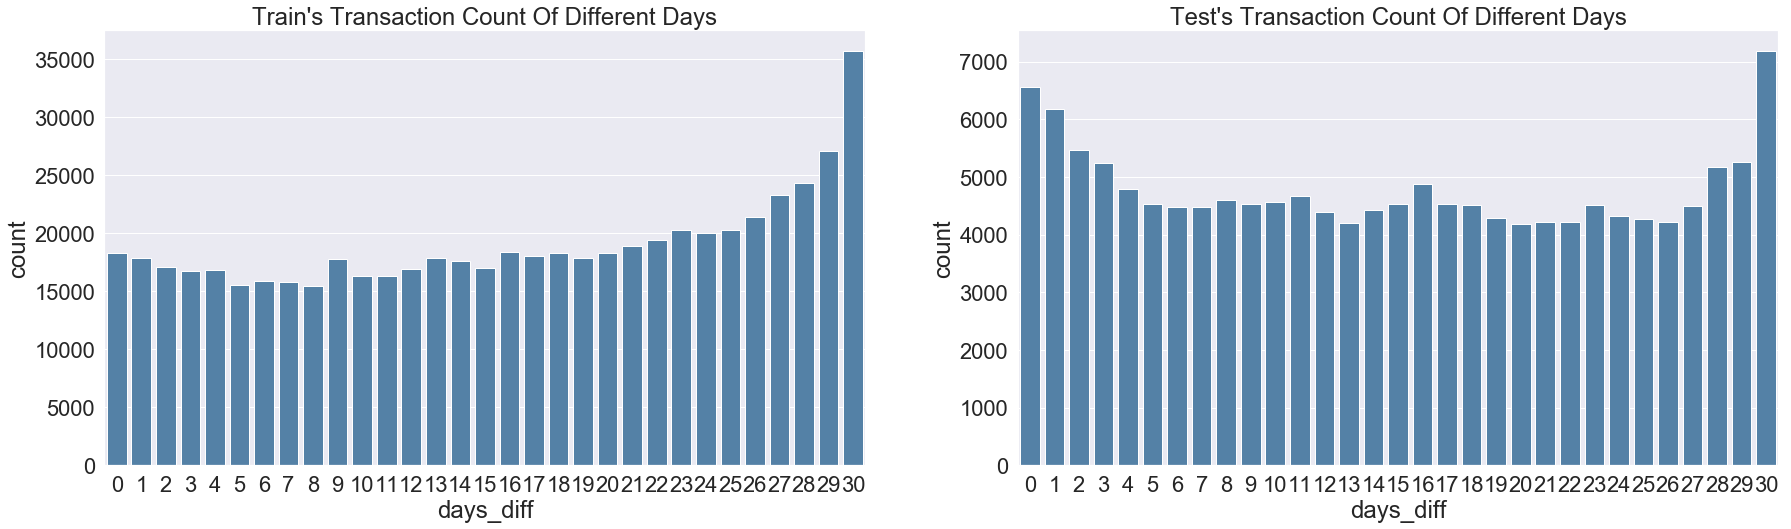

In [29]:
plt.figure(figsize=(30, 8))
plt.subplot(1,2,1)
sns.countplot(x='days_diff', data=train_trans, color='steelblue')
plt.title("Train's Transaction Count Of Different Days")
plt.subplot(1,2,2)
sns.countplot(x='days_diff', data=test_trans, color='steelblue')
plt.title("Test's Transaction Count Of Different Days")
plt.show()

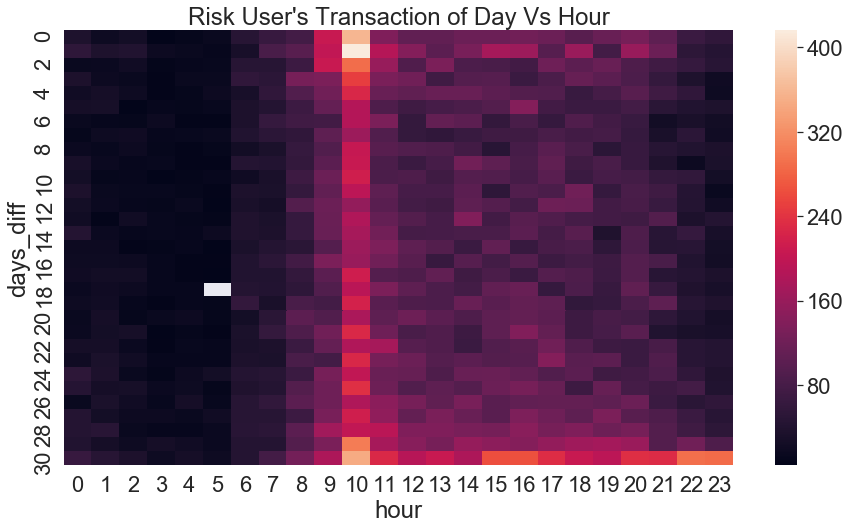

In [30]:
grouped_df = train_trans[train_trans['user'].isin(pos_user)].groupby(["days_diff", "hour"])["tm_diff"].aggregate({"trans_cnt":"count"}).reset_index()
grouped_df = grouped_df.pivot('days_diff', 'hour', 'trans_cnt')

plt.figure(figsize=(15,8))
sns.heatmap(grouped_df)
plt.title("Risk User's Transaction of Day Vs Hour")
plt.show()

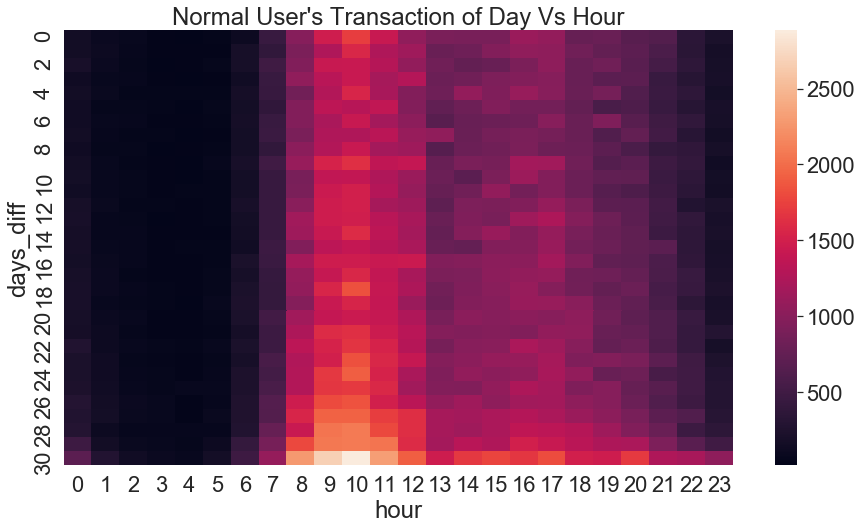

In [31]:
grouped_df = train_trans[train_trans['user'].isin(neg_user)].groupby(["days_diff", "hour"])["tm_diff"].aggregate({"trans_cnt":"count"}).reset_index()
grouped_df = grouped_df.pivot('days_diff', 'hour', 'trans_cnt')

plt.figure(figsize=(15,8))
sns.heatmap(grouped_df)
plt.title("Normal User's Transaction of Day Vs Hour")
plt.show()

### 单变量分析

#### 金额（amount）
风险用户的交易金额大都集中在一个比较低的范围

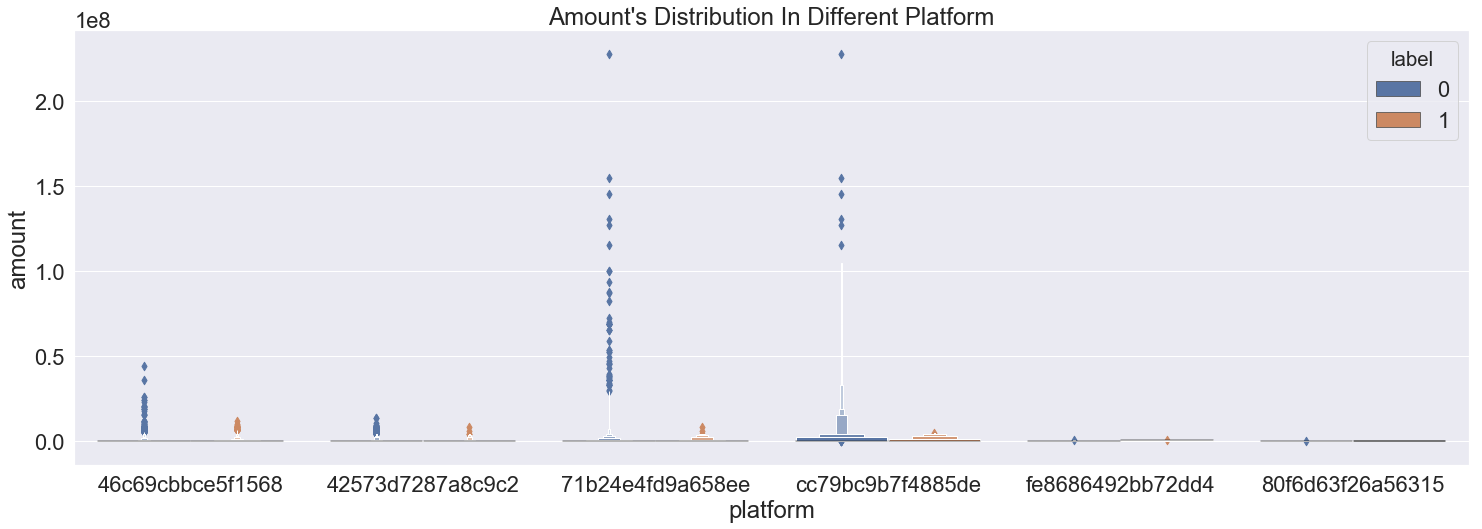

In [32]:
plt.figure(figsize=(25, 8))
sns.boxenplot(x='platform', y='amount', hue='label', data=train_trans)
plt.title("Amount's Distribution In Different Platform")
plt.show()

#### 交易来源与去向（tunnel_in和tunnel_out）
分布都比较集中

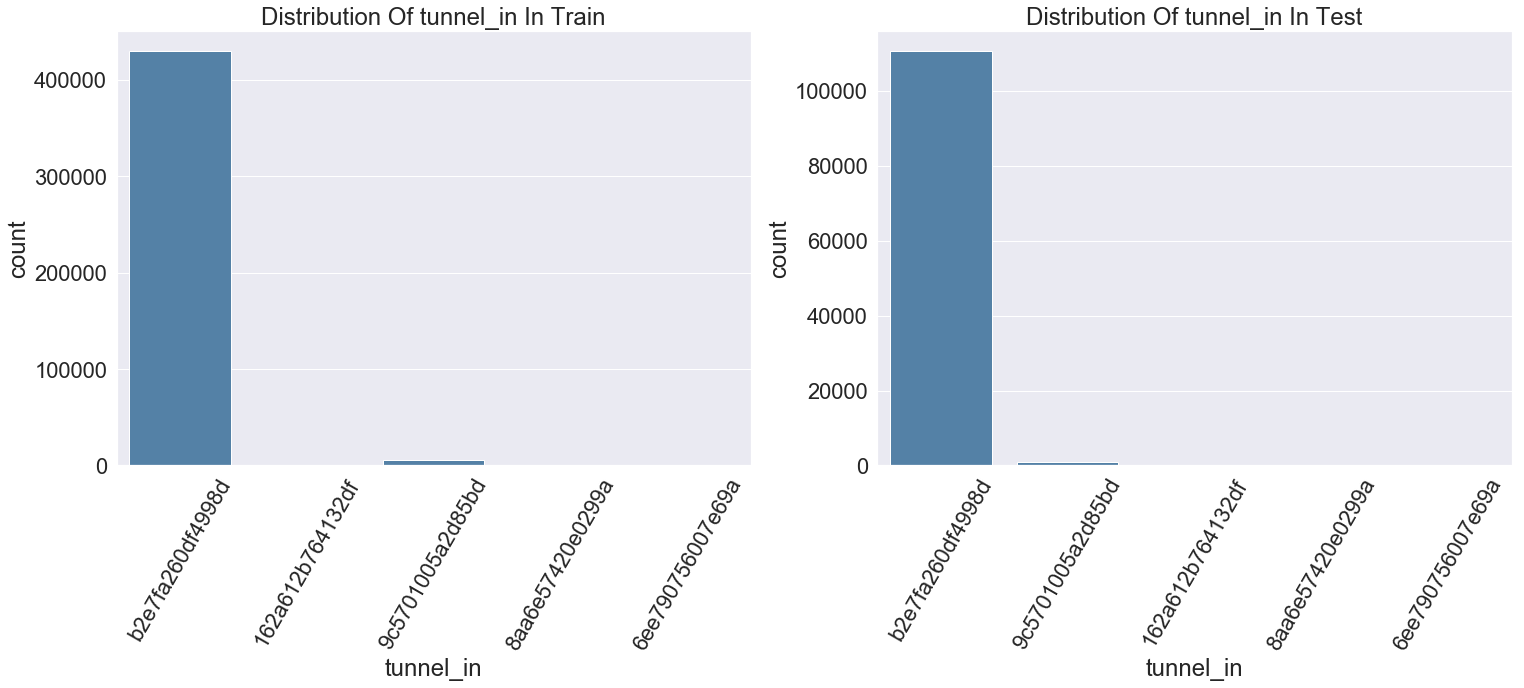

In [34]:
plt.figure(figsize=(25, 8))
plt.subplot(1,2,1)
sns.countplot(x='tunnel_in', data=train_trans, color='steelblue')
plt.title('Distribution Of tunnel_in In Train')
plt.xticks(rotation=60)
plt.subplot(1,2,2)
sns.countplot(x='tunnel_in', data=test_trans, color='steelblue')
plt.title('Distribution Of tunnel_in In Test')
plt.xticks(rotation=60)
plt.show()

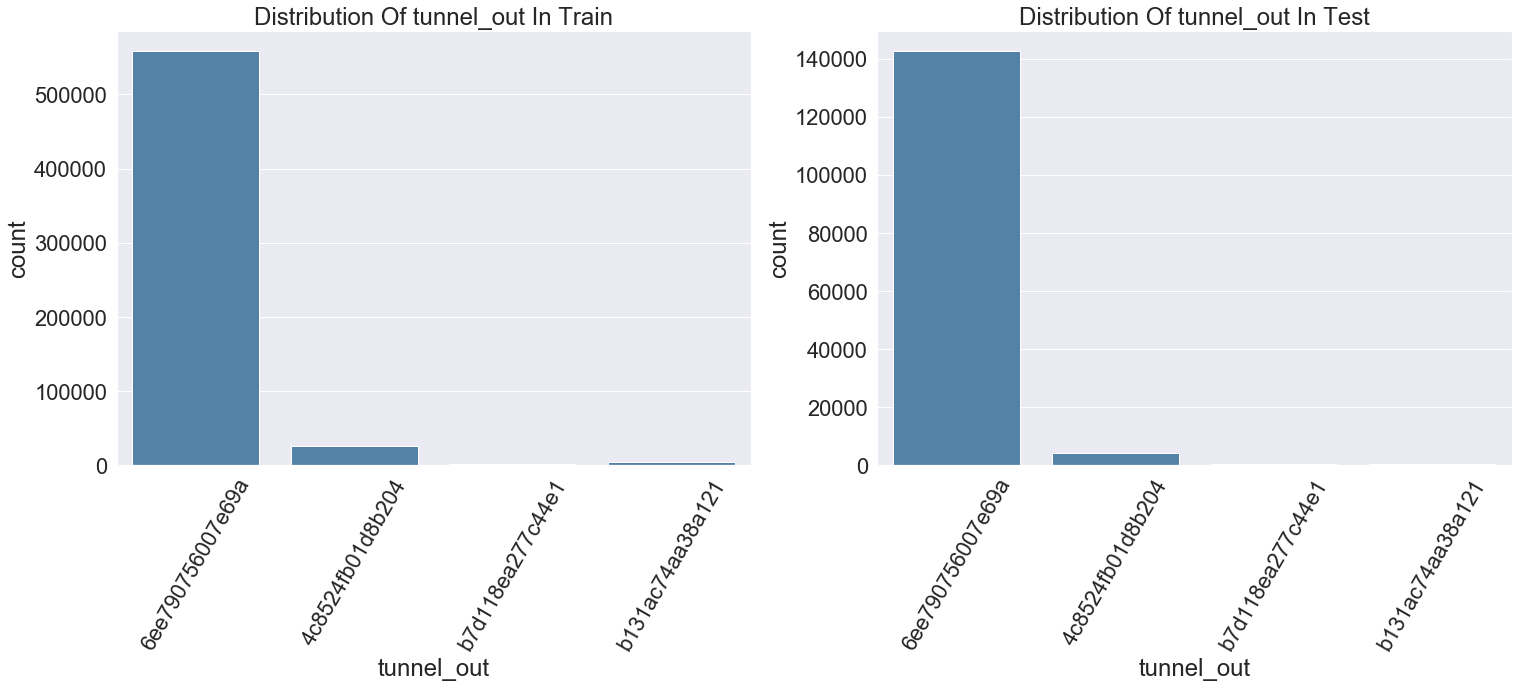

In [35]:
plt.figure(figsize=(25, 8))
plt.subplot(1,2,1)
sns.countplot(x='tunnel_out', data=train_trans, color='steelblue')
plt.title('Distribution Of tunnel_out In Train')
plt.xticks(rotation=60)
plt.subplot(1,2,2)
sns.countplot(x='tunnel_out', data=test_trans, color='steelblue')
plt.title('Distribution Of tunnel_out In Test')
plt.xticks(rotation=60)
plt.show()

#### IP

In [36]:
train_trans = train_trans.merge(train_base[['user', 'city']], on=['user'], how='left')
agg_fun = {'days_diff': ['nunique', 'max', 'min'],
           'user': ['nunique', 'count'],
           'city': ['nunique']}
pos_ip_df = train_trans[train_trans['user'].isin(pos_user)].groupby(['ip']).agg(agg_fun)
pos_ip_df.columns = ['{}_{}'.format(f[0], f[1]) for f in pos_ip_df.columns]
pos_ip_df['label'] = 1

In [37]:
neg_ip_df = train_trans[train_trans['user'].isin(neg_user)].groupby(['ip']).agg(agg_fun)
neg_ip_df.columns = ['{}_{}'.format(f[0], f[1]) for f in neg_ip_df.columns]
neg_ip_df['label'] = 0

In [38]:
ip_df = pd.concat([pos_ip_df, neg_ip_df], axis=0, ignore_index=True)
ip_df['days_range'] = ip_df['days_diff_max'] - ip_df['days_diff_min']

In [39]:
pos_ip_df.columns

Index([u'days_diff_nunique', u'days_diff_max', u'days_diff_min', u'city_nunique', u'user_nunique', u'user_count', u'label'], dtype='object')

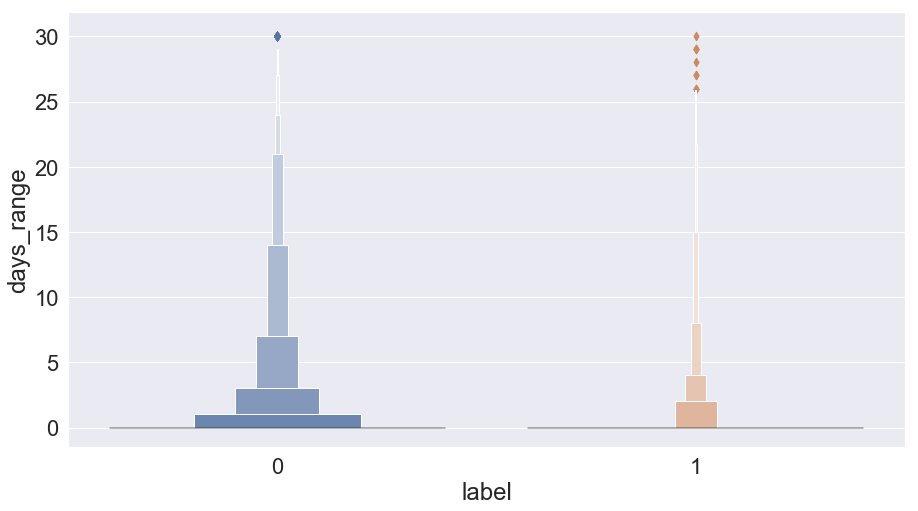

In [40]:
plt.figure(figsize=(15,8))
sns.boxenplot(x='label', y=u'days_range', data=ip_df)
plt.show()

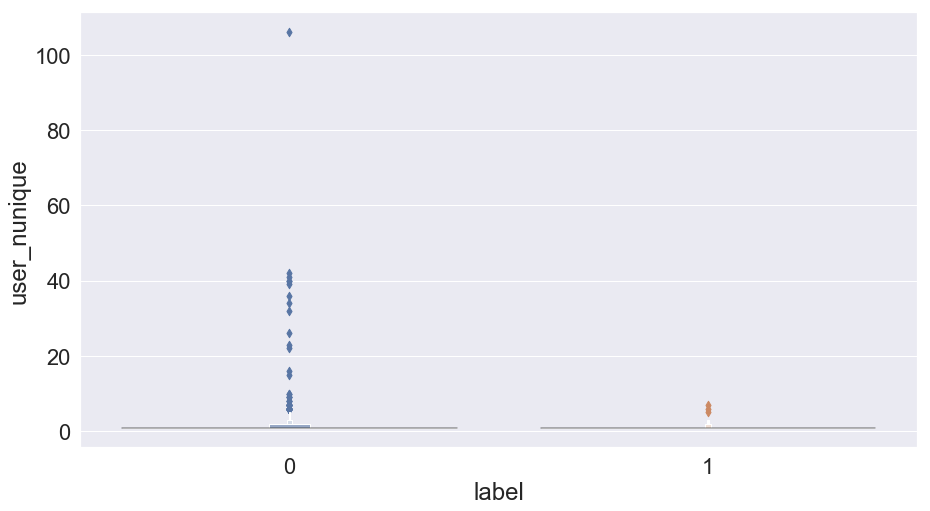

In [41]:
plt.figure(figsize=(15,8))
sns.boxenplot(x='label', y=u'user_nunique', data=ip_df)
plt.show()

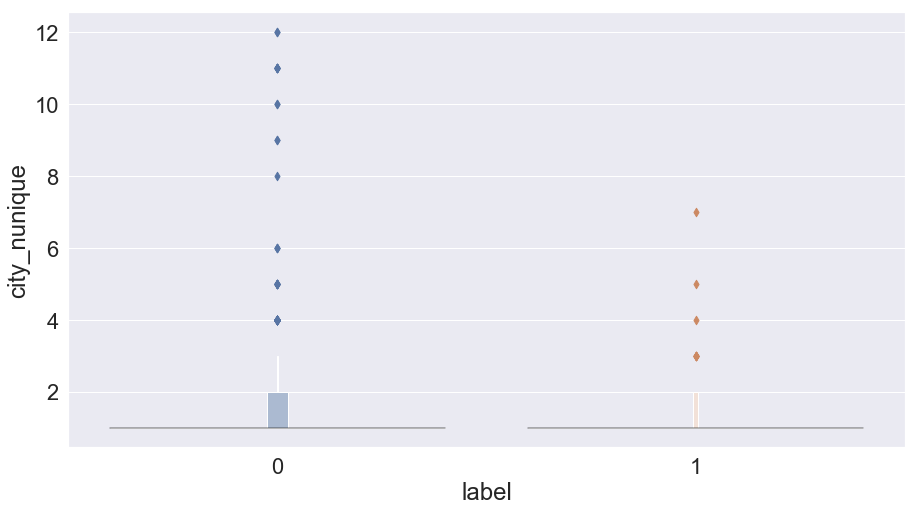

In [42]:
plt.figure(figsize=(15,8))
sns.boxenplot(x='label', y=u'city_nunique', data=ip_df)
plt.show()

## 操作日志

### 数据概况

In [43]:
train_op.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774988 entries, 0 to 2774987
Data columns (total 9 columns):
user         object
op_type      object
op_mode      object
op_device    object
ip           object
net_type     object
channel      object
ip_3         object
tm_diff      object
dtypes: object(9)
memory usage: 190.5+ MB


### Nunique值

In [44]:
train_op.nunique()

user          41892
op_type         117
op_mode         124
op_device      1036
ip           195740
net_type          3
channel          53
ip_3          57072
tm_diff      878355
dtype: int64

In [45]:
for i in test_op.columns:
    trn_ = set(train_op[i].unique())
    tst_ = set(test_op[i].unique())
    print(i, len(trn_), len(tst_), 1.0*len(trn_&tst_)/len(tst_))

('user', 41892, 20458, 0.0)
('op_type', 117, 95, 0.9894736842105263)
('op_mode', 124, 102, 0.9901960784313726)
('op_device', 1037, 831, 0.8471720818291215)
('ip', 195741, 80079, 0.08941170594038388)
('net_type', 4, 4, 1.0)
('channel', 54, 41, 1.0)
('ip_3', 57073, 31901, 0.5177580640105326)
('tm_diff', 878355, 568479, 0.8141549643874268)


### 时间分布
训练集和测试集大体分布相同，但交易日志中有31天的数据，而操作日志只有15天。

In [46]:
train_op['days_diff'] = train_op['tm_diff'].apply(lambda x: int(x.split(' ')[0]))
train_op['hour'] = train_op['tm_diff'].apply(lambda x: int(x.split(' ')[2].split('.')[0].split(':')[0]))
test_op['days_diff'] = test_op['tm_diff'].apply(lambda x: int(x.split(' ')[0]))
test_op['hour'] = test_op['tm_diff'].apply(lambda x: int(x.split(' ')[2].split('.')[0].split(':')[0]))

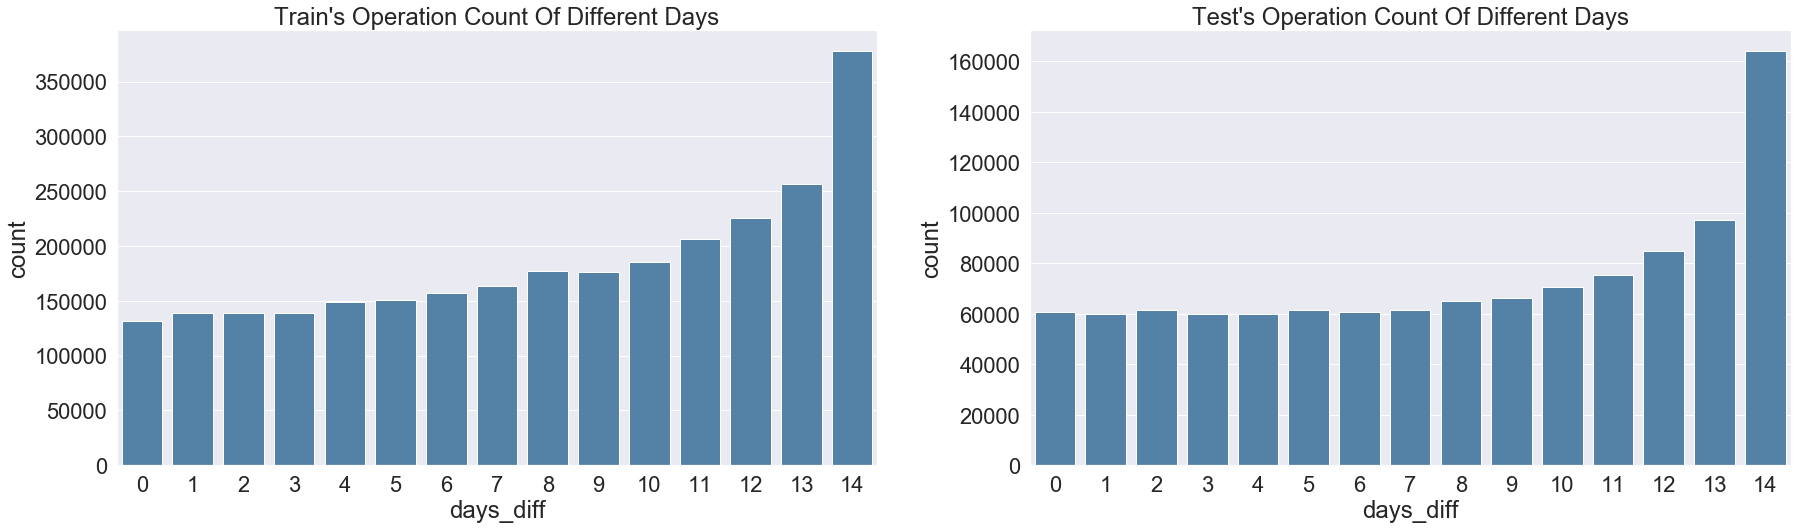

In [47]:
plt.figure(figsize=(30, 8))
plt.subplot(1,2,1)
sns.countplot(x='days_diff', data=train_op, color='steelblue')
plt.title("Train's Operation Count Of Different Days")
plt.subplot(1,2,2)
sns.countplot(x='days_diff', data=test_op, color='steelblue')
plt.title("Test's Operation Count Of Different Days")
plt.show()

### 单变量分析

#### 操作设备编码（op_device）

In [48]:
train_op = train_op.merge(train_base[['user', 'city']], on=['user'], how='left')

In [49]:
agg_fun = {'days_diff': ['nunique', 'max', 'min'],
           'user': ['nunique', 'count'],
           'city': ['nunique']}
pos_dev_df = train_op[train_op['user'].isin(pos_user)].groupby(['op_device']).agg(agg_fun)
pos_dev_df.columns = ['{}_{}'.format(f[0], f[1]) for f in pos_dev_df.columns]
pos_dev_df['label'] = 1

In [50]:
neg_dev_df = train_op[train_op['user'].isin(neg_user)].groupby(['op_device']).agg(agg_fun)
neg_dev_df.columns = ['{}_{}'.format(f[0], f[1]) for f in neg_dev_df.columns]
neg_dev_df['label'] = 0

In [51]:
dev_df = pd.concat([pos_dev_df, neg_dev_df], axis=0, ignore_index=True)
dev_df['days_range'] = dev_df['days_diff_max'] - dev_df['days_diff_min']

In [52]:
dev_df.columns

Index([u'days_diff_nunique', u'days_diff_max', u'days_diff_min', u'city_nunique', u'user_nunique', u'user_count', u'label', u'days_range'], dtype='object')

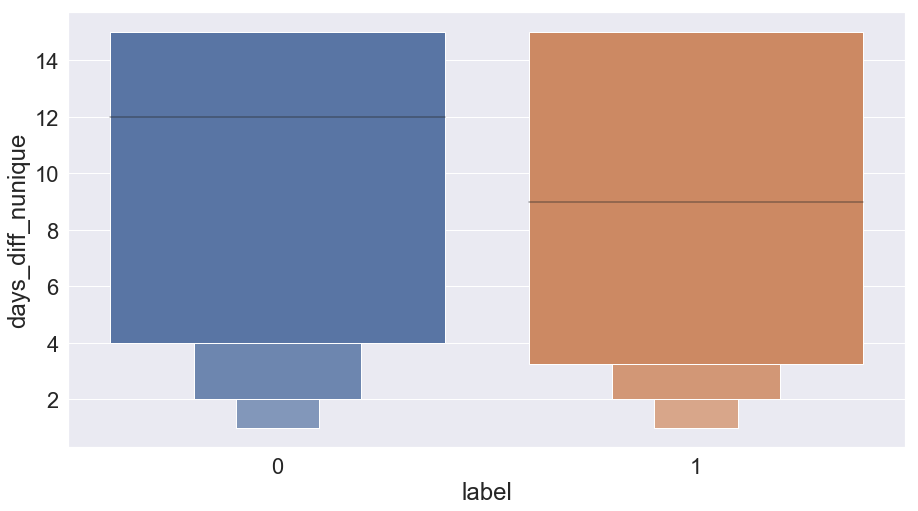

In [53]:
plt.figure(figsize=(15,8))
sns.boxenplot(x='label', y=u'days_diff_nunique', data=dev_df)
plt.show()

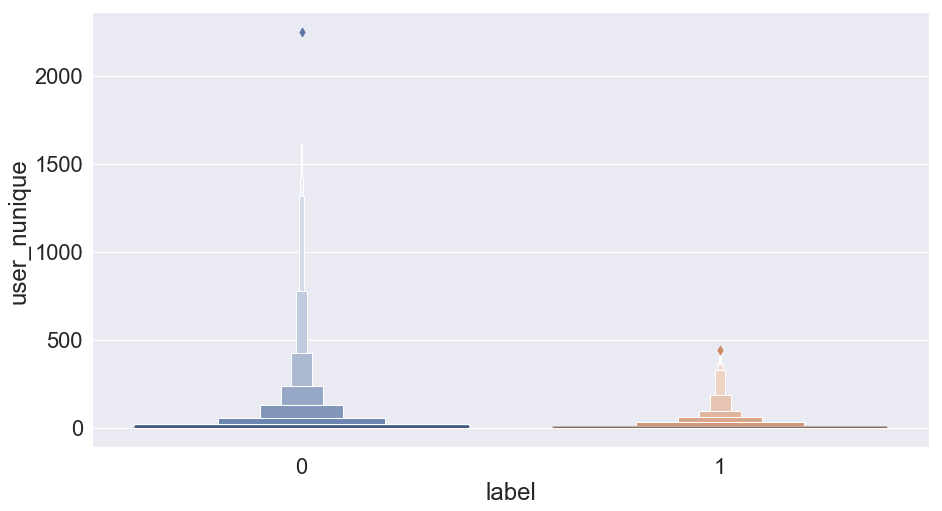

In [54]:
plt.figure(figsize=(15,8))
sns.boxenplot(x='label', y=u'user_nunique', data=dev_df)
plt.show()

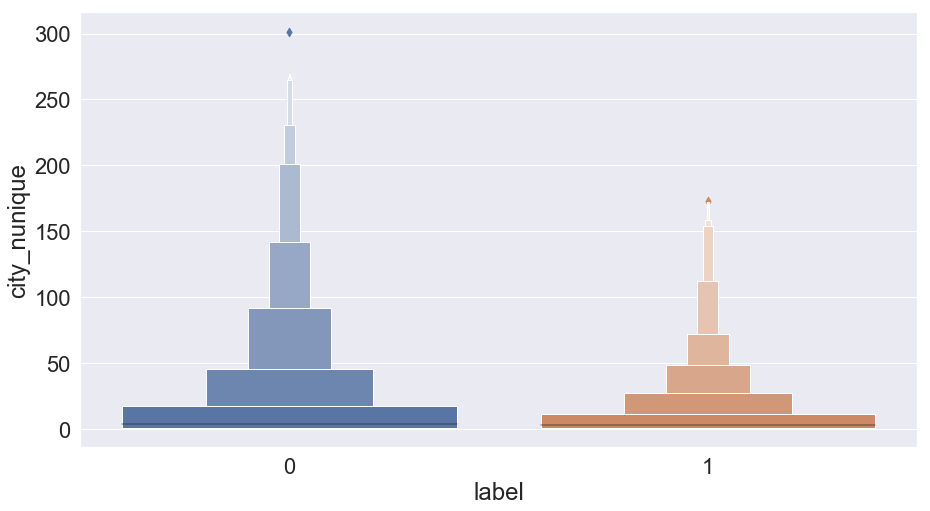

In [55]:
plt.figure(figsize=(15,8))
sns.boxenplot(x='label', y=u'city_nunique', data=dev_df)
plt.show()

#### 操作模式编码（op_type）

In [56]:
train_op[train_op['user'].isin(pos_user)]['op_type'].value_counts(normalize=True).head(15)

b26bc49195bd79cf    0.418232
af1d68e0408f5148    0.206090
22506db3af50317c    0.116605
35bc52dd67f3457c    0.063582
b88ed7c755c15ecb    0.040919
a6b741066e7e6409    0.033843
71b24e4fd9a658ee    0.016577
3089f3f91de53eee    0.013202
1f7b9f46b76ac2ba    0.010983
d2dbfbff9008d0ce    0.008742
e60611ee638b9f8b    0.007461
618c4e91ebfbdbd6    0.006803
c3e18a297049142a    0.003909
b05ceed7dc9293e4    0.003636
5e77bb97e6ec09fe    0.003610
Name: op_type, dtype: float64

In [57]:
train_op[train_op['user'].isin(neg_user)]['op_type'].value_counts(normalize=True).head(15)

b26bc49195bd79cf    0.385116
af1d68e0408f5148    0.253310
22506db3af50317c    0.158969
35bc52dd67f3457c    0.066981
b88ed7c755c15ecb    0.019187
a6b741066e7e6409    0.015642
71b24e4fd9a658ee    0.013893
3089f3f91de53eee    0.011719
1f7b9f46b76ac2ba    0.009862
5e77bb97e6ec09fe    0.009702
c3e18a297049142a    0.009014
d2dbfbff9008d0ce    0.005638
9ec71cc5ac535880    0.004751
aa3e58074640da64    0.004565
618c4e91ebfbdbd6    0.004497
Name: op_type, dtype: float64

#### 操作类型编码（op_mode）

In [58]:
train_op[train_op['user'].isin(pos_user)]['op_mode'].value_counts(normalize=True).head(15)

87ee0bdf333a54da    0.406442
af1d68e0408f5148    0.206090
22506db3af50317c    0.116605
9698d2ce0bae124b    0.069581
b88ed7c755c15ecb    0.040919
a6b741066e7e6409    0.033843
6b0823f22acf82cf    0.014500
3089f3f91de53eee    0.013202
1f7b9f46b76ac2ba    0.010983
d2dbfbff9008d0ce    0.008742
e60611ee638b9f8b    0.007461
618c4e91ebfbdbd6    0.006803
9ea0be9ee3a3bbeb    0.004810
c3e18a297049142a    0.003909
b05ceed7dc9293e4    0.003636
Name: op_mode, dtype: float64

In [59]:
train_op[train_op['user'].isin(neg_user)]['op_mode'].value_counts(normalize=True).head(15)

87ee0bdf333a54da    0.371996
af1d68e0408f5148    0.253310
22506db3af50317c    0.158969
9698d2ce0bae124b    0.070531
b88ed7c755c15ecb    0.019187
a6b741066e7e6409    0.015642
6b0823f22acf82cf    0.012380
3089f3f91de53eee    0.011719
1f7b9f46b76ac2ba    0.009862
5e77bb97e6ec09fe    0.009702
9ea0be9ee3a3bbeb    0.009332
c3e18a297049142a    0.009014
d2dbfbff9008d0ce    0.005638
9ec71cc5ac535880    0.004751
aa3e58074640da64    0.004565
Name: op_mode, dtype: float64

#### 抽样观察

In [60]:
train_trans['timestamp'] = train_trans['tm_diff'].apply(lambda x: transform_time(x))
test_trans['timestamp'] = test_trans['tm_diff'].apply(lambda x: transform_time(x))
train_op['timestamp'] = train_op['tm_diff'].apply(lambda x: transform_time(x))
test_op['timestamp'] = test_op['tm_diff'].apply(lambda x: transform_time(x))

In [61]:
tmp1 = train_trans[['user', 'tm_diff', 'ip', 'ip_3', 'timestamp']].copy()
tmp1['action'] = 'trans'
tmp2 = train_op[['user', 'tm_diff', 'ip', 'ip_3', 'timestamp']].copy()
tmp2['action'] = 'op'

In [62]:
tmp = pd.concat([tmp1, tmp2], axis=0, ignore_index=True)

In [63]:
tmp[tmp['user']=='Train_00001'].sort_values(by=['user', 'timestamp']).head(35)

,user,tm_diff,ip,ip_3,timestamp,action
421094,Train_00001,3 days 08:25:54.000000000,NaN,NaN,289554,trans
3003624,Train_00001,4 days 17:50:09.000000000,ef95ba3c65e8c857,5f9460ac44bd01d8,409809,op
3003623,Train_00001,4 days 17:50:10.000000000,ef95ba3c65e8c857,5f9460ac44bd01d8,409810,op
3003622,Train_00001,4 days 17:50:11.000000000,ef95ba3c65e8c857,5f9460ac44bd01d8,409811,op
3003625,Train_00001,4 days 17:50:11.000000000,ef95ba3c65e8c857,5f9460ac44bd01d8,409811,op
3003626,Train_00001,4 days 17:50:12.000000000,ef95ba3c65e8c857,5f9460ac44bd01d8,409812,op
3003614,Train_00001,5 days 01:49:11.000000000,ef95ba3c65e8c857,5f9460ac44bd01d8,438551,op
3003618,Train_00001,5 days 01:49:12.000000000,ef95ba3c65e8c857,5f9460ac44bd01d8,438552,op
3003615,Train_00001,5 days 01:49:13.000000000,ef95ba3c65e8c857,5f9460ac44bd01d8,438553,op
3003619,Train_00001,5 days 01:49:13.000000000,ef95ba3c65e8c857,5f9460ac44bd01d8,438553,op


In [69]:
def eda_stat(train, test):
    result = {'variable': [],
              'dtype': [],
              'nunique_train': [],
              'nunique_test': [],
              'same_in_test': [],
              'null_ratio_train': [],
              'null_ratio_test': []}
    for i in test.columns:
        trn_ = set(train[i].unique())
        tst_ = set(test[i].unique())
        result['variable'].append(i)
        result['dtype'].append(train[i].dtype)
        result['nunique_train'].append(train[i].nunique())
        result['nunique_test'].append(test[i].nunique())
        result['same_in_test'].append(1.0*len(trn_&tst_)/len(tst_)) #test中的取值和train中的重合比例
        result['null_ratio_train'].append(1.0*train[i].isnull().sum()/train.shape[0])
        result['null_ratio_test'].append(1.0*test[i].isnull().sum()/test.shape[0])
    result = pd.DataFrame(result)
    result = result[['variable', 'dtype', 'nunique_train', 'nunique_test', 'same_in_test', 'null_ratio_train', 'null_ratio_test']]
    return result

In [70]:
eda_stat(train_base, test_base)

,variable,dtype,nunique_train,nunique_test,same_in_test,null_ratio_train,null_ratio_test
0,user,object,47782,24315,0.000000,0.000000,0.000000
1,sex,object,2,2,1.000000,0.004479,0.007279
2,age,int64,48,47,0.872340,0.000000,0.000000
3,provider,object,3,3,0.750000,0.000000,0.000041
4,level,object,3,3,1.000000,0.000000,0.000000
5,verified,object,2,2,1.000000,0.000000,0.000000
6,using_time,int64,54,54,1.000000,0.000000,0.000000
7,regist_type,object,8,8,1.000000,0.000000,0.000000
8,card_a_cnt,int64,18,18,0.944444,0.000000,0.000000
9,card_b_cnt,int64,11,12,0.916667,0.000000,0.000000


In [71]:
eda_stat(train_trans, test_trans)

,variable,dtype,nunique_train,nunique_test,same_in_test,null_ratio_train,null_ratio_test
0,user,object,41560,18813,0.000000,0.000000,0.000000
1,platform,object,6,6,1.000000,0.000000,0.000000
2,tunnel_in,object,5,5,1.000000,0.263670,0.245019
3,tunnel_out,object,4,4,1.000000,0.000873,0.000101
4,amount,int64,27589,15511,0.561021,0.000000,0.000000
5,type1,object,20,17,1.000000,0.000000,0.000000
6,ip,object,87808,26323,0.046270,0.583367,0.649841
7,type2,object,12,14,0.866667,0.273647,0.252323
8,ip_3,object,31436,14775,0.491743,0.583367,0.649841
9,tm_diff,object,405827,119958,0.222453,0.000000,0.000000


In [72]:
eda_stat(train_op, test_op)

,variable,dtype,nunique_train,nunique_test,same_in_test,null_ratio_train,null_ratio_test
0,user,object,41892,20458,0.000000,0.000000,0.000000
1,op_type,object,117,95,0.989474,0.000000,0.000000
2,op_mode,object,124,102,0.990196,0.000000,0.000000
3,op_device,object,1036,830,0.847172,0.098569,0.094519
4,ip,object,195740,80078,0.089412,0.047596,0.038716
5,net_type,object,3,3,1.000000,0.557064,0.579625
6,channel,object,53,40,1.000000,0.000303,0.000266
7,ip_3,object,57072,31900,0.517758,0.047596,0.038716
8,tm_diff,object,878355,568479,0.814155,0.000000,0.000000
9,days_diff,int64,15,15,1.000000,0.000000,0.000000
